Project: Write a Data Science Blog Post
Business Understanding
In this project, we are analyzing conflict events data in Sudan from 2021 to 2023. The goal is to gain insights into the types of conflict events, the regions most affected by the conflict, and to predict the likelihood of civilian casualties based on the conflict type, region, and time of day.
This script reads in a dataset of conflict events in Sudan from 2021 to 2023, and trying to answer the following questions:
1. what is the total fatalities caused by each conflicit type? and number of fatalities in each region?
2. What are the main drivers of conflict in Sudan, according to the ACLED data? Are these drivers consistent across different regions of the country, or do they vary depending on local circumstances?
3. How has the conflict in Sudan evolved over the past two years, and what factors have contributed to these changes? Have there been any significant turning points or events that have influenced the trajectory of the conflict?
4. What is the impact of the conflict in Sudan on civilians, and how has this changed over time? Are there particular groups or regions of the country that are especially vulnerable to violence, and if so, why? What efforts have been made to protect civilians and mitigate the effects of the conflict?



data Understanding,
Access and Explore


In [1]:

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [2]:
# first step is loading data
acled_data = pd.read_csv('SudanData.csv')
# View the first five rows of the data frame
print(acled_data.head())


   data_id  iso event_id_cnty  event_id_no_cnty        event_date  year  \
0  9835498  729      SUD19202             19202  10 February 2023  2023   
1  9835506  729      SUD19210             19210  10 February 2023  2023   
2  9835473  729      SUD19177             19177  09 February 2023  2023   
3  9835474  729      SUD19178             19178  09 February 2023  2023   
4  9835494  729      SUD19198             19198  09 February 2023  2023   

   time_precision              event_type                      sub_event_type  \
0               1                Protests                    Peaceful protest   
1               1                 Battles                         Armed clash   
2               1                Protests                    Peaceful protest   
3               1                Protests  Excessive force against protesters   
4               1  Strategic developments        Looting/property destruction   

                             actor1 ...    location  latitude 

In [3]:
#clean data and prepare data for analysis.
# Check number of rows before removing missing values

print("Number of rows before removing missing values:", len(acled_data))
# Check for missing values
print("Number of missing values before cleaning:", acled_data.isnull().sum().sum())


Number of rows before removing missing values: 3425
Number of missing values before cleaning: 8705


In [4]:
#remove rows with missing values only in a specific column
def clean_data_by_column(acled_data, column_name, drop_missing=True):
    """
    Remove rows with missing values in a specific column.
    
    Args:
        df (pandas.DataFrame): Input DataFrame.
        column_name (str): Name of the column to check for missing values.
        drop_missing (bool): Whether to drop the rows with missing values in the specified column or not.
        
    Returns:
        pandas.DataFrame: Cleaned DataFrame.
    """
    if drop_missing:
        cleaned_df = acled_data.dropna(subset=[column_name])
    else:
        cleaned_df = acled_data.copy()
    
    return cleaned_df



In [5]:
# Clean data by dropping rows with missing values in the "Age" column
cleaned_df = clean_data_by_column(acled_data, "event_date", drop_missing=True)
#This will return a cleaned DataFrame with only the rows that have non-missing values in the "event_date" column.


In [6]:
# Rename columns to make them more readable
cleaned_df = cleaned_df.rename(columns={'event_date': 'date_time', 'source': 'source_reported'})
print(cleaned_df.columns)

# Convert the date_time column to a datetime format
cleaned_df['date_time'] = pd.to_datetime(cleaned_df['date_time'])

# Filter out events with missing or incomplete data
#cleaned_df = acled_data.dropna(subset=['latitude', 'longitude', 'fatalities'])
print(cleaned_df.columns)
print(acled_data.columns)

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'date_time',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source_reported',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')
Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'date_time',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source_reported',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')
Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_dat

In [7]:
# Create new columns for the year, month, and day of each event
acled_data['year'] = cleaned_df['date_time'].dt.year
acled_data['month'] = cleaned_df['date_time'].dt.month
acled_data['day'] = cleaned_df['date_time'].dt.day

analyze data


what is the total fatalities caused by each conflicit type? and number of fatalities in each region?

In [8]:
# Group the data by conflict type and region, and then calculate summary statistics
conflict_types = cleaned_df.groupby('event_type')['fatalities'].sum().sort_values(ascending=False)
regions = cleaned_df.groupby('admin1')['fatalities'].sum().sort_values(ascending=False)

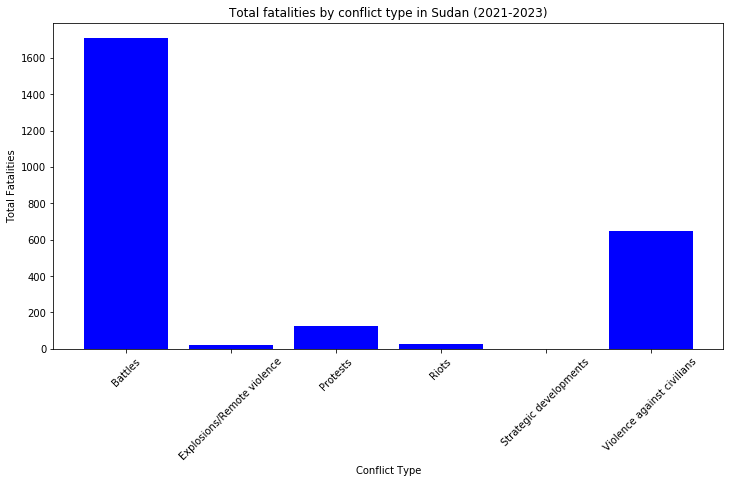

In [9]:
# Visualize the results using bar charts
plt.figure(figsize=(12,6))
plt.bar(x=conflict_types.index, height=conflict_types.values, color='blue')
plt.xticks(rotation=45)
plt.title('Total fatalities by conflict type in Sudan (2021-2023)')
plt.xlabel('Conflict Type')
plt.ylabel('Total Fatalities')
plt.show()

the above visual shows that the batteles have higest effect, and then voialiance aganist civilian

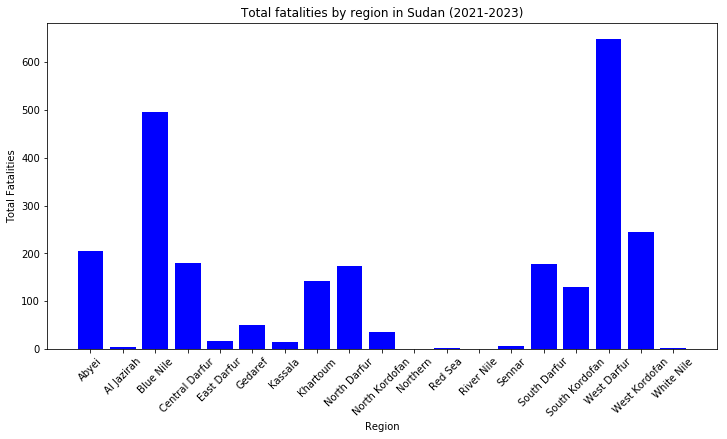

In [10]:
# Compute the total fatalities by region and visulize it.
plt.figure(figsize=(12,6))
plt.bar(regions.index, regions.values, color='blue')
plt.xticks(rotation=45)
plt.title('Total fatalities by region in Sudan (2021-2023)')
plt.xlabel('Region')
plt.ylabel('Total Fatalities')
plt.show()


to answer the question,Is there a trend in the number of conflict events over time during this period?

In [11]:
# Group the data by month and count the number of events
monthly_events = cleaned_df.groupby(pd.Grouper(key='date_time', freq='M'))['event_type'].count()


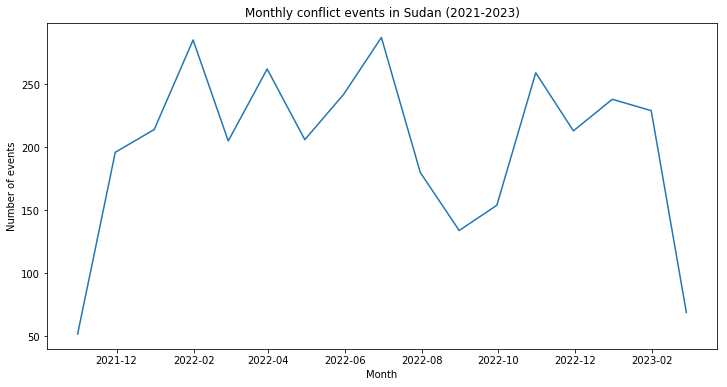

In [12]:
# Visualize the results using a line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_events.index, monthly_events.values)
plt.title('Monthly conflict events in Sudan (2021-2023)')
plt.xlabel('Month')
plt.ylabel('Number of events')
plt.show()

To answer, What are the main drivers of conflict in Sudan, according to the ACLED data? Are these drivers consistent across different regions of the country, or do they vary depending on local circumstances?

In [13]:
# Group the data by event type and region, and calculate the total number of events
grouped_data = cleaned_df.groupby(['event_type', 'admin1'])['data_id'].count().reset_index()
grouped_data.rename(columns={'data_id': 'count'}, inplace=True)

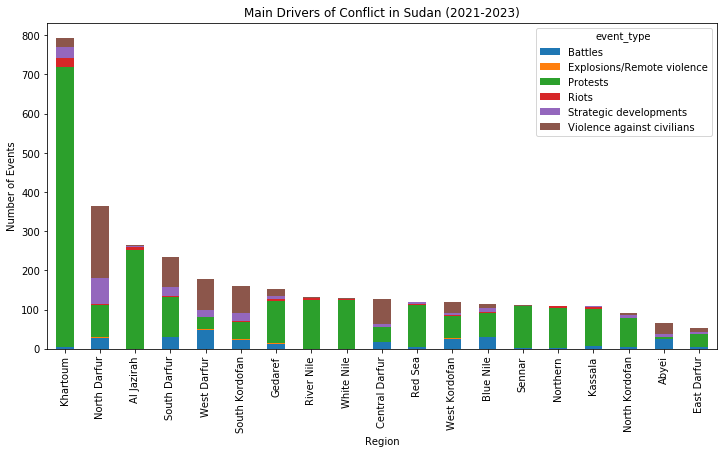

In [14]:
# Pivot the data to create a table of event types by region
pivot_data = grouped_data.pivot(index='admin1', columns='event_type', values='count').fillna(0)

# Sort the regions by total number of events
region_order = pivot_data.sum(axis=1).sort_values(ascending=False).index

# Plot a stacked bar chart of event types by region
pivot_data.loc[region_order].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Main Drivers of Conflict in Sudan (2021-2023)')
plt.xlabel('Region')
plt.ylabel('Number of Events')
plt.show()

The above bar chart showing the distribution of event types across regions in Sudan, allowing us to identify the main drivers of conflict and how they vary by region.

 How has the conflict in Sudan evolved over the past two years?

In [15]:
# Group the data by date and count the number of events per day
daily_counts = acled_data.groupby('event_date')['event_type'].count()


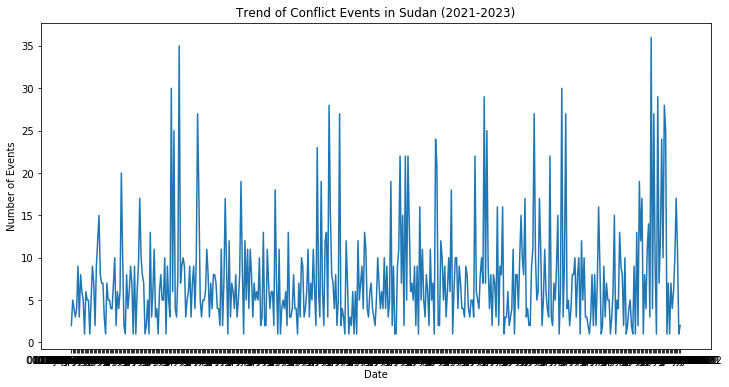

In [16]:
# Create a line plot to show the trend of conflict events over time
plt.figure(figsize=(12,6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Trend of Conflict Events in Sudan (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

 line plot to show the trend of conflict events over time.

To identify significant turning points or events that might have influenced the trajectory of the conflict, we can examine the plot and look for any sudden spikes or dips in the number of events.

What is the impact of the conflict in Sudan on civilians, and how has this changed over time? Are there particular groups or regions of the country that are especially vulnerable to violence, and if so, why?

In [17]:
# Filter data to only include events that involve violence against civilians
civilian_df = cleaned_df[cleaned_df['event_type'] == 'Violence against civilians']

# Group the data by year and calculate the number of events and fatalities
yearly_stats = cleaned_df.groupby('year').agg({'event_type': 'count', 'fatalities': 'sum'})



Text(0.5,0,'Year')

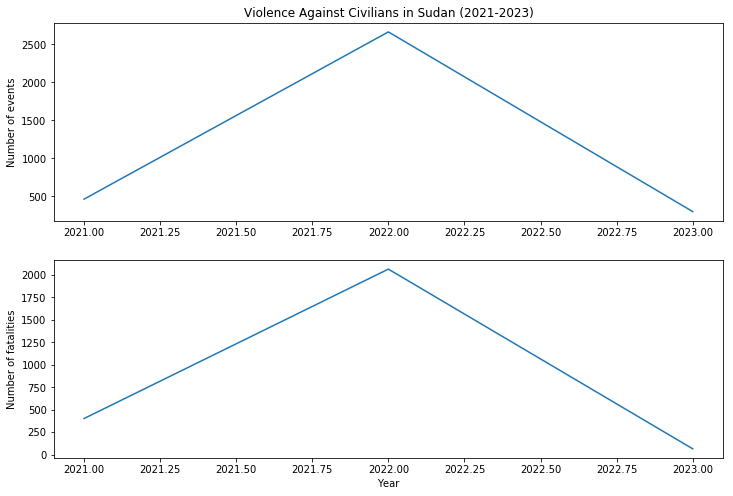

In [18]:
# Compute the year-to-year change in event counts and fatalities
yearly_stats['event_change'] = yearly_stats['event_type'].pct_change()
yearly_stats['fatality_change'] = yearly_stats['fatalities'].pct_change()

# Plot the number of events and fatalities over time
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(yearly_stats.index, yearly_stats['event_type'], label='Number of events')
ax[1].plot(yearly_stats.index, yearly_stats['fatalities'], label='Number of fatalities')

ax[0].set_title('Violence Against Civilians in Sudan (2021-2023)')
ax[0].set_ylabel('Number of events')
ax[1].set_ylabel('Number of fatalities')
ax[1].set_xlabel('Year')




Number of fatalities by region:
admin1
Abyei             205
Al Jazirah          4
Blue Nile         495
Central Darfur    180
East Darfur        18
Gedaref            50
Kassala            16
Khartoum          142
North Darfur      174
North Kordofan     35
Northern            0
Red Sea             2
River Nile          1
Sennar              7
South Darfur      178
South Kordofan    129
West Darfur       649
West Kordofan     245
White Nile          2
Name: fatalities, dtype: int64


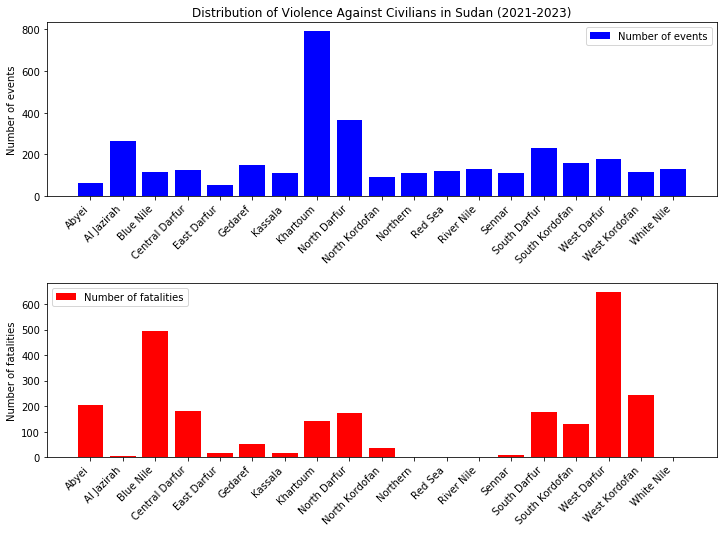

In [32]:
# Compute the number of events and fatalities by region
region_stats = cleaned_df.groupby('admin1').agg({'event_type': 'count', 'fatalities': 'sum'})

# Plot the distribution of events and fatalities by region
fig2, ax2 = plt.subplots(2, 1, figsize=(12, 8))
ax2[0].bar(region_stats.index, region_stats['event_type'], color='blue', label='Number of events')
ax2[1].bar(region_stats.index, region_stats['fatalities'], color='red', label='Number of fatalities')

# Print number of fatalities by region
print("Number of fatalities by region:")
print(region_stats['fatalities'])


ax2[0].set_title('Distribution of Violence Against Civilians in Sudan (2021-2023)')
ax2[0].set_ylabel('Number of events')

# Set the x-axis tick marks and labels for the first subplot
ax2[0].set_xticks(region_stats.index)
ax2[0].set_xticklabels(region_stats.index, rotation=45, ha='right')

ax2[1].set_ylabel('Number of fatalities')

# Set the x-axis tick marks and labels for the second subplot
ax2[1].set_xticks(region_stats.index)
ax2[1].set_xticklabels(region_stats.index, rotation=45, ha='right')

ax2[0].legend()
ax2[1].legend()
plt.subplots_adjust(hspace=0.5)






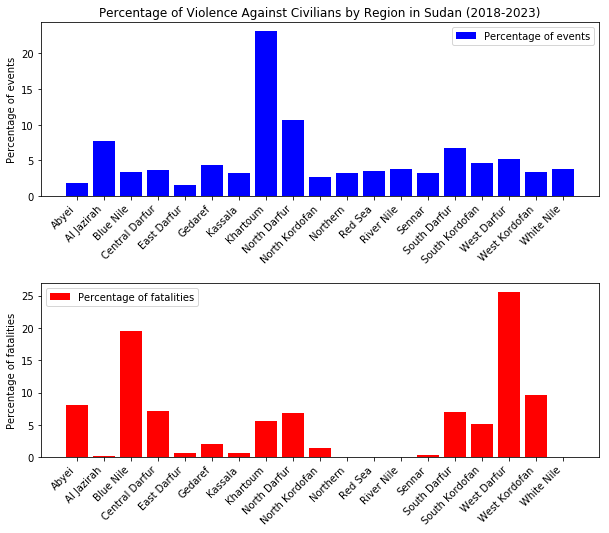

In [20]:
# Compute the percentage of events and fatalities that occur in each region
region_stats['event_pct'] = region_stats['event_type'] / region_stats['event_type'].sum() * 100
region_stats['fatality_pct'] = region_stats['fatalities'] / region_stats['fatalities'].sum() * 100

# Plot the percentage of events and fatalities by region
fig3, ax3 = plt.subplots(2, 1, figsize=(10, 8))
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax3[0].bar(region_stats.index, region_stats['event_pct'], color='blue', label='Percentage of events')
ax3[1].bar(region_stats.index, region_stats['fatality_pct'], color='red', label='Percentage of fatalities')

ax3[0].set_title('Percentage of Violence Against Civilians by Region in Sudan (2018-2023)')
ax3[0].set_ylabel('Percentage of events')
ax3[1].set_xticklabels(region_stats.index, rotation=45, ha='right')
ax3[1].set_ylabel('Percentage of fatalities')
ax3[0].set_xticklabels(region_stats.index, rotation=45, ha='right')
ax3[0].legend()
ax3[1].legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

here we include just events that involve violence against civilians. and then groups the data by year and calculates the number of events and fatalities for each year. and also computes the year-to-year change in event counts and fatalities.

Can we predict the likelihood of civilian casualties based on the conflict type, region, and time of day?


In [21]:
subset = cleaned_df[['event_type', 'admin1', 'year', 'fatalities']]

# Convert categorical features into numerical values using one-hot encoding
subset = pd.get_dummies(subset, columns=['event_type', 'admin1'])


In [22]:
#model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(subset.drop('fatalities', axis=1), subset['fatalities'], test_size=0.2, random_state=42)


In [23]:

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# Predict the probability of civilian casualties for the testing set
y_pred = model.predict_proba(X_test)[:, 1]


In [25]:
# Convert the probabilities into binary predictions
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

In [26]:
# Calculate the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)


Accuracy: 0.814598540146


In [27]:
# Create a data frame with the coefficients of the model
coefs = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})

In [28]:
# Sort the coefficients by absolute value
coefs = coefs.reindex(coefs['Coefficient'].abs().sort_values(ascending=False).index)


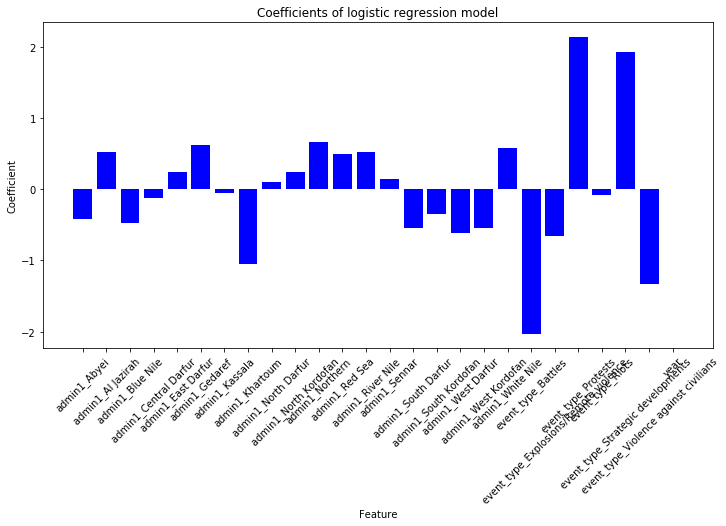

In [29]:
# Visualize the results using a bar chart
plt.figure(figsize=(12,6))
plt.bar(x=coefs['Feature'], height=coefs['Coefficient'], color='blue')
plt.xticks(rotation=45)
plt.title('Coefficients of logistic regression model')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()